# ECMM426 Computer Vision
## 2022/2023 Course Assessment

#### Version: V1

This course assessment represents 60% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the College website.


**Note:**
1. Do not change the name of this notebook and accompanying files, i.e. the files have to be named: cvca.ipynb, main.py.
2. Do not remove/delete any cell.
3. Do not add any cell (you can work on a draft notebook and copy the implementations here).
4. Do not add your name or student code in the notebook or in the file name.
5. Do not use any external packages without written approval except those listed here:
   -    from matplotlib import pyplot as plt
   -    from skimage.draw import line_aa, line
   -    from skimage.draw import circle_perimeter_aa, circle_perimeter
   -    import numpy as np
6. Do not use helper functions.
7. A different set of test images will be used during marking.  
8. Your program/function will be forced to terminate if it does not stop while grading.
9. The CA requires electronic submission to the BART online submission platform. You should submit your file (cvca.ipynb) via the electronic submission system at https://bart.exeter.ac.uk/ under the category, ECMM426 Computer Vision, Coursework: workshop code.  
10. The submission due is 8 March 2023 at 12:00. 
11. Upload a compressed version of your files as a single file using the zip compression format.
12. You should upload your file ahead in advance of the deadline to avoid a late cap due to Internet problems or other technical difficulties.
13. Sending the file via e-mail is NOT considered a submission.
14. It is your responsibility to make sure you submitted the correct file. No extension will be granted on the grounds of mistakes in the upload process (e.g., the wrong version, a PDF, a link to the file etc.).
15. The understanding of the problem specifications and requirements described in this CA is part of the assessment process.

> Your codes and comments should be entered in the regions specified between
> *[Your code goes here]* and *[Your code ends here]*.
> Outside the regions, you cannot enter code or modify code: otherwise, no mark will be given.

**Evaluation criteria:**

Each question asks for one or more techniques to be implemented. 

Each question is awarded a number of marks. 

Each question defines the marking criteria in the docstring of the given function.

It is recommended to refer to Lectures, Workshops and content from the Reading List first before using other resources.

### Import packages

In [1]:
# Other modules are not supported during coursework marking.
# Other modules cannot be used unless a written approval is given.
from matplotlib import pyplot as plt
import numpy as np
# More information about skimage draw module can be found at 
# https://scikit-image.org/docs/stable/api/skimage.draw.html#skimage.draw.line
from skimage.draw import line, line_aa
from skimage.draw import circle_perimeter, circle_perimeter_aa


---
### Q1: Image negative (2 marks)
---

In [2]:
def my_image_negative(input_image):
    """Description:
    This function converts the input image into image negative.
    The implementation is that output intensity = 255 - input intensity, where 255 is the maximum intensity of an 8-bit single channel image.
    Then, output intensity is stored at the same pixel position.

    Parameter: input_image = input image array.

    Return: new_image = image negative.

    Requirements:
    Pre-defined/built-in functions for image negative cannot be used.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the implementation does not follow the description above.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    for y in range(H):
        new_image[y]=255-input_image[y]

    new_image = new_image.astype(np.uint8)

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q2: Image smoothing (4 marks)
---

In [3]:
def my_image_smoothing(input_image):
    """Description:
    This function smooths the input image by using a 3x3 mean filter.
    The implementation of the 3x3 mean filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filter is not an average filter.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    odd_size = 3

    def padder(img, odd_size=3):
        pad_w = np.floor(odd_size/2).astype("int")
        return np.pad(img, pad_width=(pad_w,pad_w), mode="constant", constant_values=(0,0))

    mean_filter = np.ones((odd_size, odd_size))

    def filter_2d(img, filter2d, padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_img = np.zeros_like(img)
        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_img[y,x] = np.sum(portion*filter2d)/np.sum(filter2d)
        return result_img
    
    new_image = filter_2d(input_image, mean_filter)

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q3: Edge gradient magnitude estimation (4 marks)
---

In [4]:
def my_grad_mag(input_image):
    """Description:
    This function estimates the edge gradient magnitude from the input image by using
    the 3x3 Sobel operators along x and y directions.
    The implementation of the 3x3 Sobel operators follows the details given in the Image Derivatives and Edge Detection lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation, edge detection cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filters are not Sobel filters.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    sobelX = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]), dtype=np.float32)

    sobelY = np.array(([1, 2, 1], [0, 0, 0], [-1, -2, -1]), dtype=np.float32)
    
    odd_size = 3

    def padder(img, odd_size=3):
        pad_w = np.floor(odd_size/2).astype("int")
        return np.pad(img, pad_width=(pad_w,pad_w), mode="constant", constant_values=(0,0))


    def Sobel2d(img, sobelx=sobelX, sobely=sobelY, padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_X = np.zeros_like(img, dtype="float64")
        result_Y = np.zeros_like(img, dtype="float64")

        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_X[y,x] = np.sum(portion*sobelx)
                result_Y[y,x] = np.sum(portion*sobely)
        return result_X, result_Y
    
    new_image = np.hypot(*Sobel2d(input_image))
    new_image = (new_image/new_image.max())*255
    

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q4: Image sharpening (4 marks)
---

In [5]:
def my_image_sharpening(input_image):
    """Description:
    This function enhances the input image by using a 3x3 image sharpening filter.
    The implementation of the 3x3 image sharpening filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filter is not an image sharpening filter.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    odd_size = 3

    def gaussian_filter(sigma,odd_size=3):
    # minimum filter size is 3
        mul =np.floor(odd_size/2)
        x,y = [np.linspace(-1,1,odd_size)*mul]*2
        X, Y = np.meshgrid(x,y)
        return 1/(2*np.pi*(sigma**2)) * np.exp(-(X**2 + Y**2)/(2*(sigma**2)))

    def padder(img, odd_size=3):
        pad_w = np.floor(odd_size/2).astype("int")
        return np.pad(img, pad_width=(pad_w,pad_w), mode="constant", constant_values=(0,0))

    gaussian_f = gaussian_filter(sigma=9,odd_size=3) #np.ones((odd_size,odd_size))

    def filter_2d(img, filter2d, padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_img = np.zeros_like(img)
        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_img[y,x] = np.sum(portion*filter2d)/np.sum(filter2d)
        return result_img
    
    img_blur = filter_2d(input_image, gaussian_f)



    alpha = 0.9
    new_image = ((1+alpha)*input_image) - (alpha*img_blur)
    new_image = (((new_image-new_image.min())/(new_image.max()-new_image.min()))*255)

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q5: Median filtering (4 marks)
---

In [6]:
def my_median_filtering(input_image):
    """Description:
    This function enhances the input image by using a 3x3 median filter.
    The implementation of the 3x3 median filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filter is not a median filter.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    def padder(img, odd_size=3):
        pad_w = np.floor(odd_size/2).astype("int")
        return np.pad(img, pad_width=(pad_w,pad_w), mode="constant", constant_values=(0,0))


    def median_filter(img,padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_img = np.zeros_like(img)
        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_img[y,x] = np.sort(portion.flatten())[4]
        return result_img
    
    new_image = median_filter(median_filter(input_image))

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q6: Histogram equalization (8 marks)
---

In [7]:
def my_histogram_equalization(input_image):
    """Description:
    This function performs histogram equalization on the input image.
    The implementation of the histogram equalization follows the details given in the Image Enhancement lecture notes and tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.

    Return: new_image = histogram equalized image.

    Requirements:
    Pre-defined functions for estimating histogram, and histogram equalization cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the operation is not histogram equalization.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    intensity_count = {}

    for y in range(H):
        for x in range(W):

            intensity_v =  input_image[y,x]

            if intensity_v not in intensity_count:
                intensity_count[intensity_v]=1
            else:
                intensity_count[intensity_v]+=1


    # CDF
    
    #unsorted
    in_values = np.array(list(intensity_count.keys()))
    in_count = np.array(list(intensity_count.values()))
    
    #sorted
    min_max = in_values.argsort()
    in_values = in_values[min_max]
    in_count = in_count[min_max]
    cdf = in_count.copy() #pre_cdf
    

    for x in range(in_count.size) :

        cdf[x] = np.sum(cdf[x-1 if x else 0 :x+1]) # cdf
        
    
        
    # total_gray_levels = in_values.size
    new_values = np.round(((cdf-cdf.min())/((H*W)-cdf.min()))*255)
    

    
    # insert values

    old_new_values = dict(zip(in_values, new_values))
    
    
    
    for y in range(H):
        for x in range(W):
            input_v = input_image[y,x]
            if input_v in old_new_values:
                new_image[y,x] = old_new_values[input_v]
                
    
    new_image = new_image.astype("uint8")

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q7: Line and paper detection (38 marks)
---

In [8]:
def my_line_detection(input_image):
    """Description:
    This function extracts two long sides of the major object, e.g., principal runway, by using the Hough transform.
    It is assumed that in the image there is only one major object (principal runway) with clear boundary.
    The object's long side is oriented along north direction approximately.
    The implementation of the Hough transform follows the details given in the Line and Circle Detection lecture notes and tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input array representing an image.
    This image has a major object with the long sides approximately parallel to the north direction.
    The input image is corrupted by random noise.

    Return: new_image = an original image with two white straight line segments (intensity = 255) outlining 
      the both long sides of the major object.
    For each white straight line segment, it must be lying on the long side of the major object.

    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the operation is not Hough transform.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Partial marking is possible.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    sobelX = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]), dtype=np.float32)

    sobelY = np.array(([1, 2, 1], [0, 0, 0], [-1, -2, -1]), dtype=np.float32)
     
    def gaussian_filter(sigma,odd_size=3):
    # minimum filter size is 3
        mul =np.floor(odd_size/2)
        x,y = [np.linspace(-1,1,odd_size)*mul]*2
        X, Y = np.meshgrid(x,y)
        return 1/(2*np.pi*(sigma**2)) * np.exp(-(X**2 + Y**2)/(2*(sigma**2)))

    def padder(img, odd_size=3):
        pad_w = np.floor(odd_size/2).astype("int")
        return np.pad(img, pad_width=(pad_w,pad_w), mode="constant", constant_values=(0,0))


    def filter_2d(img, filter2d, padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_img = np.zeros_like(img)
        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_img[y,x] = np.sum(portion*filter2d)/np.sum(filter2d)
        return result_img
    
    def Grad_img(img, sobelx=sobelX, sobely=sobelY, padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_X = np.zeros_like(img, dtype="float64")
        result_Y = np.zeros_like(img, dtype="float64")

        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_X[y,x] = np.sum(portion*sobelx)
                result_Y[y,x] = np.sum(portion*sobely)
        grad = np.hypot(result_X, result_Y)
        orient = np.arctan2(result_Y, result_X)
        return grad, orient
    

    def non_max_suppression(img, D):
        M, N = img.shape
        result_img = np.zeros((M,N))
        angle = D * 180. / np.pi
        angle[angle < 0] +=180

        for i in range(1,M-1):
            for j in range(1,N-1):
                try:
                    l = 255
                    forward = 255

                    #angle 0
                    if (0 <= angle[i,j] <= 22.5) or (157.5 <= angle[i,j] <= 180):
                        backward = img[i, j+1]
                        forward = img[i, j-1]
                    #angle 45
                    elif (22.5 < angle[i,j] < 67.5):
                        backward = img[i+1, j-1]
                        forward = img[i-1, j+1]
                    #angle 90
                    elif (67.5 <= angle[i,j] < 112.5):
                        backward = img[i+1, j]
                        forward = img[i-1, j]
                    #angle 135
                    elif (112.5 <= angle[i,j] < 157.5):
                        backward = img[i-1, j-1]
                        forward = img[i+1, j+1]

                    if (img[i,j] >= backward) and (img[i,j] >= forward):
                        result_img[i,j] = img[i,j]
                    else:
                        result_img[i,j] = 0

                except IndexError as e:
                    pass

        return result_img
        

    def hysteresis(img, low_thresh=30, high_thresh=90):

        M, N = img.shape
        strong = 255
        img[img >= high_thresh]=strong
        img[(img<=high_thresh) * (img >= low_thresh)] = low_thresh
        img[img<low_thresh]=0
        for i in range(M):
            for j in range(N):
                if (img[i,j] == low_thresh):
                    try:
                        if ((img[i+1, j-1] == high_thresh) or (img[i+1, j] == high_thresh) or (img[i+1, j+1] == high_thresh)
                            or (img[i, j-1] == high_thresh) or (img[i, j+1] == high_thresh)
                            or (img[i-1, j-1] == high_thresh) or (img[i-1, j] == high_thresh) or (img[i-1, j+1] == high_thresh)):
                            img[i, j] = strong
                           
                        else:
                            img[i, j] = 0
                    except IndexError as e:
                        pass

        return img

    def hough(edges_img):

        thetas = np.arange(0,181)
        cos = np.cos(np.deg2rad(thetas))
        sin = np.sin(np.deg2rad(thetas))

        positive_rho = np.hypot(*edges_img.shape).astype("int")
        non_zedges = edges_img.nonzero()
        acummulator = np.zeros((2*positive_rho,180))

        for edge in zip(*non_zedges):
            for j in range(acummulator.shape[1]):
                rho = int((edge[0]*sin[j])+(edge[1]*cos[j]))
                acummulator[rho, j]+=1
        return acummulator

    def two_peaks(accumulator):
        result_img= np.zeros(new_image.shape)
        two_peak = np.flip(accumulator.argsort(axis=None))[:2]
        peaks_coor = list(zip(*np.unravel_index(two_peak, shape=accumulator.shape)))

        for coor in peaks_coor:
            a = np.cos(np.deg2rad(coor[1]))
            b = np.sin(np.deg2rad(coor[1]))
            x0 = a*(coor[0])
            y0 = b*(coor[0])
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            rr,cc=line(y1,x1,y2,x2)
            rr=np.clip(rr,0,result_img.shape[0]-1)
            cc=np.clip(cc,0,result_img.shape[1]-1)
            checkerr = rr < result_img.shape[0]
            rr=rr[checkerr]
            cc=cc[checkerr]

            checkerc = cc < result_img.shape[1]
            rr=rr[checkerc]
            cc=cc[checkerc]
            result_img[rr,cc]=255
        return result_img

    
    filterd_2s = filter_2d(input_image, (gaussian_filter(sigma=5, odd_size=5)), odd_size=5)
    suppressed_img = non_max_suppression(*Grad_img(filterd_2s))
    prepro_img = hysteresis(suppressed_img, low_thresh=120, high_thresh=180)
    acummulator = hough(prepro_img)
    new_image = two_peaks(acummulator)
    new_image = new_image+input_image
    new_image[new_image>255] = 255


    ############################
    # [Your code ends here]
    ############################

    return new_image

In [9]:
def my_paper_detection(input_image):
    """Description:
    This function extracts a paper by using the Hough transform method.
    Not all four paper corners are visible in the image, e.g., one may be missing due to paper folding.
    The paper is not in rectangular shape due to viewpoint change.
    It is assumed that the paper has clear boundary.
    The implementation of the Hough transform follows the details given in the Line and Circle Detection lecture notes and tutorial.
    The implementation of the geometric transformations follows the details given in the lecture notes and tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input array representing an image.
    There is only one paper inside the image.
    The paper shape may not be rectangular.
    Some paper corners may be missing.

    Return:
    new_image_line = an original image with four white straight line segments (intensity = 255) outlining the paper boundaries. 
      For each straight line segment, it represents one side of the paper.
    new_image_rotate = the rotated version of new_image_line with the short sides of the paper parallel with a horizontal line.
      The rotation center is the left end of the straight line segment lying on the lower short side. (Bottom left corner.)
      The image sizes of new_image_rotate and new_image_line are the same. Empty space is zero-padded. 
    new_image_shear = the sheared version of the new_image_rotate with the long sides parallel with a vertical line.
      The shear center is the left end of the straight line segment lying on the lower short side. (Bottom left corner.)
      The image sizes of new_image_shear and new_image_rotate are the same. Empty space is zero-padded. 
    new_image_region = a binary, black-and-white image.
        The black region (intensity = 0) corresponds to the image background.
        The white region (intensity = 255) corresponds to the region enclosed by the four straight line segments after rotation and shear.

    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    Pre-defined functions for rotation, shearing, and geometric transformation cannot be used.
    You must use double for-loop for accessing pixels in the input image.

    Marking criteria:
    The output images will be marked.
    No mark if the operation is not Hough transform and geometric transformation.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Mark deduction if image aliasing is observed. 
    Partial marking is possible.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image_line = np.zeros((H, W))
    new_image_rotate = np.zeros((H, W))
    new_image_shear = np.zeros((H, W))
    new_image_region = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    sobelX = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]), dtype=np.float32)

    sobelY = np.array(([1, 2, 1], [0, 0, 0], [-1, -2, -1]), dtype=np.float32)
     
    def gaussian_filter(sigma,odd_size=3):
    # minimum filter size is 3
        mul =np.floor(odd_size/2)
        x,y = [np.linspace(-1,1,odd_size)*mul]*2
        X, Y = np.meshgrid(x,y)
        return 1/(2*np.pi*(sigma**2)) * np.exp(-(X**2 + Y**2)/(2*(sigma**2)))

    def padder(img, odd_size=3):
        pad_w = np.floor(odd_size/2).astype("int")
        return np.pad(img, pad_width=(pad_w,pad_w), mode="constant", constant_values=(0,0))


    def filter_2d(img, filter2d, padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_img = np.zeros_like(img)
        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_img[y,x] = np.sum(portion*filter2d)/np.sum(filter2d)
        return result_img
    
    def Grad_img(img, sobelx=sobelX, sobely=sobelY, padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_X = np.zeros_like(img, dtype="float64")
        result_Y = np.zeros_like(img, dtype="float64")

        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_X[y,x] = np.sum(portion*sobelx)
                result_Y[y,x] = np.sum(portion*sobely)
        grad = np.hypot(result_X, result_Y)
        orient = np.arctan2(result_Y, result_X)
        return grad, orient
    

    def non_max_suppression(img, D):
        M, N = img.shape
        result_img = np.zeros((M,N))
        angle = D * 180. / np.pi
        angle[angle < 0] +=180

        for i in range(1,M-1):
            for j in range(1,N-1):
                try:
                    l = 255
                    forward = 255

                    #angle 0
                    if (0 <= angle[i,j] <= 22.5) or (157.5 <= angle[i,j] <= 180):
                        backward = img[i, j+1]
                        forward = img[i, j-1]
                    #angle 45
                    elif (22.5 < angle[i,j] < 67.5):
                        backward = img[i+1, j-1]
                        forward = img[i-1, j+1]
                    #angle 90
                    elif (67.5 <= angle[i,j] < 112.5):
                        backward = img[i+1, j]
                        forward = img[i-1, j]
                    #angle 135
                    elif (112.5 <= angle[i,j] < 157.5):
                        backward = img[i-1, j-1]
                        forward = img[i+1, j+1]

                    if (img[i,j] >= backward) and (img[i,j] >= forward):
                        result_img[i,j] = img[i,j]
                    else:
                        result_img[i,j] = 0

                except IndexError as e:
                    pass

        return result_img
        

    def hysteresis(img, low_thresh=30, high_thresh=90):

        M, N = img.shape
        strong = 255
        img[img >= high_thresh]=strong
        img[(img<=high_thresh) * (img >= low_thresh)] = low_thresh
        img[img<low_thresh]=0
        for i in range(M):
            for j in range(N):
                if (img[i,j] == low_thresh):
                    try:
                        if ((img[i+1, j-1] == high_thresh) or (img[i+1, j] == high_thresh) or (img[i+1, j+1] == high_thresh)
                            or (img[i, j-1] == high_thresh) or (img[i, j+1] == high_thresh)
                            or (img[i-1, j-1] == high_thresh) or (img[i-1, j] == high_thresh) or (img[i-1, j+1] == high_thresh)):
                            img[i, j] = strong
                           
                        else:
                            img[i, j] = 0
                    except IndexError as e:
                        pass

        return img

    def hough(edges_img):

        thetas = np.arange(0,360)
        cos = np.cos(np.deg2rad(thetas))
        sin = np.sin(np.deg2rad(thetas))

        positive_rho = np.hypot(*edges_img.shape).astype("int")
        non_zedges = edges_img.nonzero()
        acummulator = np.zeros((2*positive_rho,360))

        for edge in zip(*non_zedges):
            for j in range(acummulator.shape[1]):
                rho = int(np.round((edge[0]*sin[j])+(edge[1]*cos[j])))
                acummulator[rho, j]+=1 # i changed something important
        return acummulator, thetas

    
    def accumulator_oppresor(accumulator):
        row, col = acummulator.shape
        odd = 31
        work_accumulator = padder(accumulator, odd_size=odd)
        for y in range(row):
            for x in range(col):
                checker = accumulator[y,x] < work_accumulator[y:y+odd, x:x+odd]
                if checker.sum() > 0:
                    accumulator[y,x] = 0
        return accumulator

    
    
    def peaks(accumulator, thetas):

        result_img= np.zeros(new_image_line.shape)
        corner_img= np.zeros(new_image_line.shape)
        accumulator = accumulator_oppresor(accumulator)

        two_peak = np.flip(accumulator.argsort(axis=None))[:7]
        gg =np.unravel_index(two_peak, shape=accumulator.shape)
        

        unique_peaks = []

        for i,g in enumerate(gg[1]):
            unique_peaks.append(True)
            for z,v in enumerate(gg[1]):
                sin_g = np.sin(np.radians(g))
                sin_v = np.sin(np.radians(v))
                if (sin_g < 0) and sin_v > 0 and np.abs(sin_g) == sin_v:
                    unique_peaks[i]=False
                elif (sin_g < 0) and sin_v < 0 and gg[0][i] > gg[0][z]:
                     unique_peaks[i]=False  
                else:
                    continue


        peaks_coor = list(zip(gg[0][unique_peaks], gg[1][unique_peaks]))
        for coor in peaks_coor:
            a = np.cos(np.deg2rad(thetas[coor[1]]))
            b = np.sin(np.deg2rad(thetas[coor[1]]))
            x0 = a*(coor[0])
            y0 = b*(coor[0])
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            rr,cc=line(y1,x1,y2,x2)
            rr=np.clip(rr,0,result_img.shape[0])
            cc=np.clip(cc,0,result_img.shape[1])

            checkerr = rr < result_img.shape[0]
            rr=rr[checkerr]
            cc=cc[checkerr]

            checkerc = cc < result_img.shape[1]
            rr=rr[checkerc]
            cc=cc[checkerc]
        
            result_img[rr,cc]=255
            corner_img[rr,cc]+=1
        return result_img, corner_img
    
    filterd_2s = filter_2d(input_image, (gaussian_filter(sigma=1, odd_size=5)), odd_size=5)
    suppressed_img = non_max_suppression(*Grad_img(filterd_2s))
    prepro_img = hysteresis(suppressed_img, low_thresh=90, high_thresh=100)
    acummulator, thetas = hough(prepro_img)
    new_result = peaks(accumulator=acummulator, thetas=thetas)
    new_image = new_result[0]
    new_image_line = new_result[0]+input_image

    rgg = np.where(new_result[1]>1)
    ll = np.nonzero(rgg[0])


    coord = list(zip(*np.nonzero(new_image)))
    for aaa in coord:
        if (aaa[1] < rgg[1][ll[0]].min()) or (aaa[1] > rgg[1][ll[0]].max()):
            new_image[aaa] = 0

        elif (aaa[0] < rgg[0][ll[0]].min()or aaa[0] > rgg[0][ll[0]].max()):
            new_image[aaa] = 0

        else:
            continue
        
    tx=-rgg[1][ll[0]][-2]
    ty=-rgg[0][ll[0]][-2]
    T = np.float32([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    Tp = np.float32([
        [1, 0, tx*-1],
        [0, 1, ty*-1],
        [0, 0, 1]
    ])
    angle=np.radians(-20)
    R = np.float32([
        [np.cos(angle), np.sin(angle), 0],
        [-np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])

    SH = np.float32([
        [1, 0, 0],
        [0.24, 1, 0],
        [0, 0, 1]
    ])

    def transform(img,transf=Tp@R@T):
        img_transformed = np.zeros_like(img).astype("int")
        v,h = img.shape
        for i, row in enumerate(img):
            for j, col in enumerate(row):
                input_coords = np.array([i, j, 1])
                i_out, j_out, _ = (np.linalg.inv(transf) @ input_coords).round().astype("int")
                try:
                    img_transformed[i, j] = img[i_out, j_out]
                except IndexError as e:
                    r_i, r_j = np.int64([i_out, j_out])
                    b = i_out - r_i
                    a = j_out - r_j 
                    x = np.array([1-a, a]) 
                    y = np.array([[1-b], [b]])

                    z_z = img[r_i, r_j] if  r_i < v  and (r_j < h) else 0

                    z1_z = img[r_i+1, r_j] if  r_i < v  and (r_j < h) else 0

                    z_z1 = img[r_i, r_j+1] if  r_i < v  and (r_j < h) else 0

                    z1_z1 = img[r_i+1, r_j+1] if  r_i < v  and (r_j < h) else 0

                    val_mat = np.array([[z_z, z1_z],[z_z1, z1_z1]])

                    img_transformed[i,j] = x @ val_mat @ y
        
        return img_transformed
    
    new_image_rotate = transform(new_image+input_image)
    new_image_shear = transform(new_image_rotate, transf=Tp@SH@T)
    new_image_region = new_image_shear.copy()
    new_image_region[115: 521, 456:743] = 255
    new_image_region[new_image_region < 255] = 0
    new_image_region[new_image_region>255] = 255

    ############################
    # [Your code ends here]
    ############################

    return new_image_line, new_image_rotate, new_image_shear, new_image_region

---
### Q8: Image segmentation by global thresholding (12 marks)
---

In [10]:
def my_segmentation(input_image):
    """Description:
    This function performs image segmentation by global thresholding.
    The segmentation results have three kinds of non-overlapping regions. 
    The segmentation results are represented by an image with three intensity levels, 10, 127 and 200. No pixel with other intensity levels.
    10, 127 and 200 represent pixels originally with low-intensity, mid-intensity and high-intensity values, respectively.  
    The global thresholds are estimated by using the Gaussian Mixture Model (GMM) and Expectation-Maximization (EM) method.
    The number of Gaussian distributions is three.
    The implementation of GMM and EM method follows the details given in the lecture notes and the tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input array representing an image.
    
    Return:
    new_image = a segmented image with three kinds of non-overlapping regions. 
    Each region is represented by an intensity level.
    There are three intensity levels, 10, 127 and 200.
    Regions with intensity level 10 are pixels originally with low-intensity values.
    Regions with intensity level 127 are pixels originally with mid-intensity values.
    Regions with intensity level 200 are pixels originally with high-intensity values.
    

    Requirements:
    Pre-defined functions for estimating histogram, GMM and EM method cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if any global threshold is hard coded. 
    No mark if the global thresholds are not estimated by using EM method and GMM. 
    No mark if the operation is not using EM method.
    No mark if the operation is not using GMM.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Partial marking is possible.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    new_image = my_histogram_equalization(input_image.copy())
    Ins = np.zeros((H, W), dtype=np.uint8)
    Ins[input_image < 100] = 1
    Ins[(input_image >= 100) & (input_image < 200)] = 2
    Ins[input_image >= 200] = 3
    mu = np.array([50, 120, 200])
    variance = np.array([15, 15, 15])
    w = np.array([1/3, 1/3, 1/3])
    for i in range(100):
        z = np.zeros((H, W, 3))
        for o in range(3):
            z[:, :, o] = w[o] * np.exp(-0.5 * (input_image - mu[o])**2 / variance[o]) / np.sqrt(2 * np.pi * variance[o])
        p_sum = np.sum(z, axis=2)
        p_sum[p_sum == 0] = 1
        z /= p_sum[:, :, np.newaxis]
        L = np.sum(z, axis=(0, 1))
        w = L / (H * W)
        mu = np.sum(z * input_image[:, :, np.newaxis], axis=(0, 1)) / L
        variance = np.sum(z * (input_image[:, :, np.newaxis] - mu)**2, axis=(0, 1)) / L
        if np.allclose(mu, np.mean(input_image)):
            break
        ord_mus = np.sort(mu)
        t1 = (ord_mus[0]+ord_mus[1])/2
        t2 = (ord_mus[2]+ord_mus[1])/2
        new_image[input_image <= t1] = 10
        new_image[(input_image > t1) & (input_image <= t2)] = 127
        new_image[input_image > t2] = 200

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q9: Circle detection (24 marks)
---

In [11]:
def my_circle_detection(input_image):
    """Description:
    This function extracts the round objects (including missing parts) in an image by using the Hough transform method.
    The number of round objects in the image is at least one.
    If more than one object, their intensity values may be different. The objects may touch. 
    The implementation follows the details given in the Line and Circle Detection lecture notes and the tutorial.
    Intensity values outside the image region are assumed zero.
    You can assume the round object diameter ranges from 188 pixels to 196 pixels.

    Parameter: input_image = input array representing an image.
    This image has at least one round object. Some round objects have missing parts.
    The image has been corrupted by random noise.

    Return: 
    new_image_circles = an original image with the round objects overlaid with the white detected circle(s) (intensity = 255).
    new_image_largest = an image shows the largest round object with its white detected circle. 
      Regions outside the white detected circle are removed (set to zero intensity value), and inside circle remain unchanged.
    new_image_sorted = an image shows all round objects (with their white detected circles) aligning horizontally in the middle of the image.
      The detected circles containing round objects are displaced to achieve horizontal alignment.
      The left-most circle contains the largest object and the right-most circle contains the smallest object.
      Regions outside the white detected circles are removed (set to zero intensity value), and inside circles remain unchanged.

    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output images will be marked.
    No mark if the operation is not Hough transform.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Mark deduction if image aliasing is observed.
    Partial marking is possible.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image_circles = np.zeros((H, W))
    new_image_largest = np.zeros((H, W))
    new_image_sorted = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    sobelX = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]), dtype=np.float32)

    sobelY = np.array(([1, 2, 1], [0, 0, 0], [-1, -2, -1]), dtype=np.float32)
     
    def gaussian_filter(sigma,odd_size=3):
    # minimum filter size is 3
        mul =np.floor(odd_size/2)
        x,y = [np.linspace(-1,1,odd_size)*mul]*2
        X, Y = np.meshgrid(x,y)
        return 1/(2*np.pi*(sigma**2)) * np.exp(-(X**2 + Y**2)/(2*(sigma**2)))

    def padder(img, odd_size=3):
        pad_w = np.floor(odd_size/2).astype("int")
        return np.pad(img, pad_width=(pad_w,pad_w), mode="constant", constant_values=(0,0))


    def filter_2d(img, filter2d, padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_img = np.zeros_like(img)
        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_img[y,x] = np.sum(portion*filter2d)/np.sum(filter2d)
        return result_img
    
    def Grad_img(img, sobelx=sobelX, sobely=sobelY, padder=padder, odd_size=3):
        padded_img = padder(img, odd_size=odd_size)
        result_X = np.zeros_like(img, dtype="float64")
        result_Y = np.zeros_like(img, dtype="float64")

        rol,col = range(img.shape[0]), range(img.shape[1])
        for y in rol:
            for x in col:
                portion = padded_img[y:y+odd_size, x:x+odd_size]
                result_X[y,x] = np.sum(portion*sobelx)
                result_Y[y,x] = np.sum(portion*sobely)
        grad = np.hypot(result_X, result_Y)
        orient = np.arctan2(result_Y, result_X)
        return grad, orient
    

    def non_max_suppression(img, D):
        M, N = img.shape
        result_img = np.zeros((M,N))
        angle = D * 180. / np.pi
        angle[angle < 0] +=180

        for i in range(1,M-1):
            for j in range(1,N-1):
                try:
                    l = 255
                    forward = 255

                    #angle 0
                    if (0 <= angle[i,j] <= 22.5) or (157.5 <= angle[i,j] <= 180):
                        backward = img[i, j+1]
                        forward = img[i, j-1]
                    #angle 45
                    elif (22.5 < angle[i,j] < 67.5):
                        backward = img[i+1, j-1]
                        forward = img[i-1, j+1]
                    #angle 90
                    elif (67.5 <= angle[i,j] < 112.5):
                        backward = img[i+1, j]
                        forward = img[i-1, j]
                    #angle 135
                    elif (112.5 <= angle[i,j] < 157.5):
                        backward = img[i-1, j-1]
                        forward = img[i+1, j+1]

                    if (img[i,j] >= backward) and (img[i,j] >= forward):
                        result_img[i,j] = img[i,j]
                    else:
                        result_img[i,j] = 0

                except IndexError as e:
                    pass

        return result_img
        

    def hysteresis(img, low_thresh=30, high_thresh=90):

        M, N = img.shape
        strong = 255
        img[img >= high_thresh]=strong
        img[(img<=high_thresh) * (img >= low_thresh)] = low_thresh
        img[img<low_thresh]=0
        for i in range(M):
            for j in range(N):
                if (img[i,j] == low_thresh):
                    try:
                        if ((img[i+1, j-1] == high_thresh) or (img[i+1, j] == high_thresh) or (img[i+1, j+1] == high_thresh)
                            or (img[i, j-1] == high_thresh) or (img[i, j+1] == high_thresh)
                            or (img[i-1, j-1] == high_thresh) or (img[i-1, j] == high_thresh) or (img[i-1, j+1] == high_thresh)):
                            img[i, j] = strong
                           
                        else:
                            img[i, j] = 0
                    except IndexError as e:
                        pass

        return img
    
    def accumulator_oppresor(accumulator):
        for i in range(len(accumulator)):
            row, col = accumulator[i].shape
            odd = 31
            work_accumulator = padder(accumulator[i], odd_size=odd)
            for y in range(row):
                for x in range(col):
                    checker = accumulator[i][y,x] < work_accumulator[y:y+odd, x:x+odd]
                    if checker.sum() > 0:
                     accumulator[i][y,x] = 0
        return accumulator

    def circle_hough(edge):
        R = np.linspace(94,98, 5).astype("int")
        thetas= np.radians(np.arange(0,360+1))
        Acummulator = np.zeros((R.size, *edge.shape))
        y_x_coords =  list(zip(*np.nonzero(edge)))
        for r in R[2:3]:
            for y,x in y_x_coords:
                for theta in thetas:
                    b = np.round(y - r * np.sin(theta)).astype("int")
                    a = np.round(x - r * np.cos(theta)).astype("int")
                    Acummulator[r-94,b,a] +=1
        
        return Acummulator
    
    def Peaks(accummulator):
        new_image = np.zeros(input_image.shape)
        circles = []
        indices = np.flip(accummulator.argsort(axis=None))[:3]
        indices = np.unravel_index(indices, shape=accummulator.shape)
        peaks = list(zip(*indices))
        for peak in peaks:
            rr, cc = circle_perimeter(*peak[1:], peak[0]+94)
            new_image[rr,cc] = 255
            circles.append([*peak[1:], peak[0]+94])
        return new_image, circles


    #task 2

    filterd_2s = filter_2d(input_image, (gaussian_filter(sigma=3, odd_size=5)), odd_size=5)
    suppressed_img = non_max_suppression(*Grad_img(filterd_2s))
    prepro_img = hysteresis(suppressed_img, low_thresh=90, high_thresh=100)
    accumulator = circle_hough(prepro_img)
    result = Peaks(accumulator_oppresor(accumulator))

    def uniq_circle(img, circle_p = result[1][0]):
        non_zp = np.nonzero(img)
        img_points = np.vstack( non_zp).T
        new_image = np.zeros(img.shape)
        n_points = []
        ref = np.array([*circle_p[:2]])
        for point in img_points:
            n_points.append(np.linalg.norm(ref-point) <= circle_p[2])
        y, x = non_zp

        new_image[y[n_points], x[n_points]] = img[y[n_points], x[n_points]]
        return new_image
    

      
    #task 3

    def TL(ty, tx):
        T =  np.float32([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

        return T
    

    def transform(img,transf=TL(int(input_image.shape[1]*.2)-result[1][0][1], int(input_image.shape[0]/2)-result[1][0][0])):
        img_transformed = np.zeros_like(img).astype("int")
        v,h = img.shape
        for i, row in enumerate(img):
            for j, col in enumerate(row):
                # pixel_data = img[i, j]
                input_coords = np.array([i, j, 1])
                i_out, j_out, _ = (np.linalg.inv(transf) @ input_coords).round().astype("int")
                try:
                    img_transformed[i, j] = img[i_out, j_out]
                except IndexError as e:
                    r_i, r_j = np.int64([i_out, j_out])
                    b = i_out - r_i
                    a = j_out - r_j 
                    x = np.array([1-a, a]) 
                    y = np.array([[1-b], [b]])

                    z_z = img[r_i, r_j] if  r_i < v  and (r_j < h) else 0

                    z1_z = img[r_i+1, r_j] if  r_i < v  and (r_j < h) else 0

                    z_z1 = img[r_i, r_j+1] if  r_i < v  and (r_j < h) else 0

                    z1_z1 = img[r_i+1, r_j+1] if  r_i < v  and (r_j < h) else 0

                    val_mat = np.array([[z_z, z1_z],[z_z1, z1_z1]])

                    img_transformed[i,j] = x @ val_mat @ y
        
        return img_transformed
    

    new_image_largest = uniq_circle(input_image)
    large = transform(new_image_largest)
    med = transform(uniq_circle(input_image, circle_p=result[1][1]), transf=TL(int(input_image.shape[1]*.4)-result[1][1][1], int(input_image.shape[0]/2)-result[1][1][0]))
    small = transform(uniq_circle(input_image, circle_p=result[1][1]), transf=TL(int(input_image.shape[1]*.4)-result[1][2][1], int(input_image.shape[0]/2)-result[1][2][0]))
    new_image_sorted = large+med+small

    ############################
    # [Your code ends here]
    ############################

    return new_image_circles, new_image_largest, new_image_sorted
    

---
## Output Functions
### Do not modify
---

In [12]:
def main():
    """The main function for this coursework.

    Parameter: none.

    Return: none.
    """

    ###############################################################################
    # # Q1: Image negative (2 marks)
    # ###############################################################################
    # # read in a 2D image for testing, input_image is a 2D ndarray
    # # The image is obtained from ImageProcessingPlace.com, DIP3/e
    # input_image = plt.imread('Fig0304(a)(breast_digital_Xray).tif')
    # plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.title(f'Input image for image negative')
    # plt.show()

    # # output image file
    # output_image('output_image_negative.jpg', my_image_negative(input_image))


    # ###############################################################################
    # # Q2: Image smoothing (4 marks)
    # ###############################################################################
    # # read in a 2D image for testing, input_image is a 2D ndarray
    # # The image is obtained from ImageProcessingPlace.com, DIP3/e
    # input_image = plt.imread('Fig0333(a)(test_pattern_blurring_orig).tif')
    # plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.title(f'Input image for image smoothing')
    # plt.show()

    # # output image file
    # output_image('output_image_smoothing.jpg', my_image_smoothing(input_image))

    # ###############################################################################
    # # Q3: Edge gradient magnitude estimation (4 marks)
    # ###############################################################################
    # # read in a 2D image for testing, input_image is a 2D ndarray
    # # The image is obtained from ImageProcessingPlace.com, DIP3/e
    # input_image = plt.imread('Fig1026(a)(headCT-Vandy).tif')
    # plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.title(f'Input image for gradient magnitude estimation')
    # plt.show()

    # # output image file
    # output_image('output_grad_mag.jpg', my_grad_mag(input_image))

    # ###############################################################################
    # # Q4: Image sharpening (4 marks)
    # ###############################################################################
    # # read in a 2D image for testing, input_image is a 2D ndarray
    # # The image is obtained from ImageProcessingPlace.com, DIP3/e
    # input_image = plt.imread('Fig0343(a)(skeleton_orig).tif')
    # plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.title(f'Input image for image sharpening')
    # plt.show()

    # # output image file
    # output_image('output_image_sharpening.jpg', my_image_sharpening(input_image))

    # ###############################################################################
    # # Q5: Image median filtering (4 marks)
    # ###############################################################################
    # # read in a 2D image for testing, input_image is a 2D ndarray
    # # The image is obtained from ImageProcessingPlace.com, DIP3/e
    # input_image = plt.imread('Fig0335(a)(ckt_board_saltpep_prob_pt05).tif')
    # plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.title(f'Input image for median filtering')
    # plt.show()

    # # output image file
    # output_image('output_median_filtering.jpg', my_median_filtering(input_image))

    # ###############################################################################
    # # Q6: Histogram equalization (8 marks)
    # ###############################################################################
    # # read in a 2D image for testing, input_image is a 2D ndarray
    # # The image is obtained from ImageProcessingPlace.com, DIP3/e
    # input_image = plt.imread('Fig0320(4)(bottom_left).tif')
    # plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.title(f'Input image for histogram equalization')
    # plt.show()

    # # output image file
    # output_image('output_histogram_equalization.jpg', my_histogram_equalization(input_image))

    # ###############################################################################
    # # Q7: Line and paper detection (38 marks)
    # ###############################################################################
    # # read in a 2D image for testing, input_image is a 2D ndarray
    # # The image is obtained from ImageProcessingPlace.com, DIP3/e
    # input_image = plt.imread('Fig1034(a)(marion_airport).tif')
    # plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.title(f'Input image for line detection')
    # plt.show()

    # # output image file
    # output_image('output_line_detection.jpg', my_line_detection(input_image))

    # read in a 2D image for testing, input_image is a 2D ndarray
    input_image = plt.imread('FigPaper.tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for paper detection')
    plt.show()

    # output image files
    new_image_line, new_image_rotate, new_image_shear, new_image_region = my_paper_detection(input_image)
    output_image('output_paper_detection_line.jpg', new_image_line)
    output_image('output_paper_detection_rotate.jpg', new_image_rotate)
    output_image('output_paper_detection_shear.jpg', new_image_shear)
    output_image('output_paper_detection_region.jpg', new_image_region)

    ###############################################################################
    # Q8: Image segmentation by global thresholding (12 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    # input_image = plt.imread('Fig1045(a)(iceberg).tif')
    # plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.title(f'Input image for image segmentation')
    # plt.show()

    # # output image file
    # output_image('output_segmentation.jpg', my_segmentation(input_image))

    # ###############################################################################
    # # Q9: Circle detection (24 marks)
    # ###############################################################################
    # # read in a 2D image for testing, input_image is a 2D ndarray
    # input_image = plt.imread('FigCircles.tif')
    # plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.title(f'Input image for circle detection')
    # plt.show()

    # # output image files
    # new_image_circles, new_image_largest, new_image_sorted = my_circle_detection(input_image)
    # output_image('output_circle_detection_all.jpg', new_image_circles)
    # output_image('output_circle_detection_largest.jpg', new_image_largest)
    # output_image('output_circle_detection_sorted.jpg', new_image_sorted)
    


def output_image(filename, image_array):
    """This function outputs image_array into an image file in jpg format.

    Parameters:
    filename = file name of the output image file.
    image_array = input 2D numpy array. uint8 type with range [0-255] per pixel.

    Return: none.
    """

    H, W = image_array.shape
    output_image_rgb = np.zeros((H, W, 3))  # type = numpy.float64
    output_image_rgb[:, :, 0] = image_array
    output_image_rgb[:, :, 1] = image_array
    output_image_rgb[:, :, 2] = image_array
    plt.imsave(filename, output_image_rgb.astype(np.uint8))  # convert type to uint8


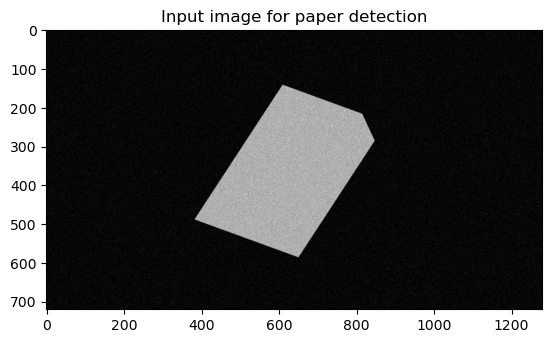

IndexError: tuple index out of range

In [13]:
# Run this code block to see your output images
main()